In [194]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [195]:
wine = pd.read_csv('winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [196]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [197]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [198]:
#find out the number of null values in each column
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [199]:
#preprossesing of Data
group_names = ['bad','good']
bins = (2, 6.5, 8)
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels = group_names) #cuting out the recent quality and replacing it with bins
wine['quality'].unique() #checking the unique values in quality

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [200]:
#turning the Categorical data into ones and zeros
label_quality = LabelEncoder()

In [201]:
#Applying the Above into our Data(The Label Encoder)
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [202]:
#view
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [203]:
#to check the number of Good and Bad Wines
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

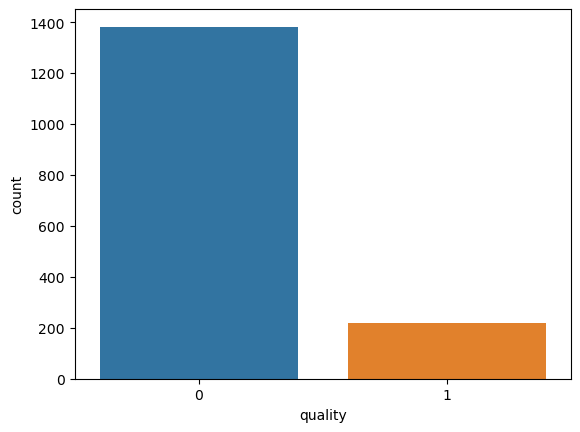

In [204]:
#plotting it on a graph using seaborn. Seaborn is Way Simpler
sns.countplot(x='quality', data=wine) #set the X label

In [205]:
#Separating the dataset as response variable and feature variables
X = wine.drop('quality', axis=1) #Dropping column quality horizontally (Tumetoa Quality so tunajaribu kupredict)
y = wine['quality']#What we are looking for(What we are Fitting in(Rows))
#this is done to predict the quality of the wine

In [206]:
#Train and Test the data by splitting. This is done so that we can know how good our model is
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
#Applying Standard scaling to get optimized result. Alot of time sets it up from 0 to 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #don't refit the Data

In [208]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

Model Number 1 used in Classification

Random Forest Classifier

In [209]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)

In [210]:
predict_rfc[:20] #predicting our first 20 variables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [211]:
#Let's See how the Model(RFC) Performed
print(classification_report(y_test,predict_rfc))
print(confusion_matrix(y_test,predict_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[264   9]
 [ 23  24]]


SVM Classifier

In [212]:
svm_c = SVC()
svm_c.fit(X_train, y_train)
predict_svc = svm_c.predict(X_test)

In [213]:
#Let's See how the Model(SVC) Performed
print(classification_report(y_test,predict_svc))
print(confusion_matrix(y_test,predict_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


Neural Network(Better for Huge amounts of Data)

In [214]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500) #Goes through the Data 500 times to program the three different layers
mlpc.fit(X_train, y_train)
y_pred_mlpc = mlpc.predict(X_test)

c:\Users\Randy\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [215]:
#Let's See how the Model(RFC) Performed
print(classification_report(y_test,y_pred_mlpc))
print(confusion_matrix(y_test,y_pred_mlpc))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       273
           1       0.67      0.70      0.69        47

    accuracy                           0.91       320
   macro avg       0.81      0.82      0.82       320
weighted avg       0.91      0.91      0.91       320

[[257  16]
 [ 14  33]]


Giving Accuracy Score

In [216]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, predict_rfc)
print('The Precision of the Random Forest Classifier is:',cm)

The Precision of the Random Forest Classifier is: 0.9


In [217]:
#manually adding a new wine(Row) to predict its quality
Xnew_dropped = [[7.5,0.68,0.01,2.1,0.075,16.0,22.0,0.9965,3.40,0.50,10.0]]
Xnew_dropped = scaler.transform(Xnew_dropped)
ynew = rfc.predict(Xnew_dropped)
ynew
#Turns out to be a bad wine

c:\Users\Randy\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])